# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# MCMC-based scheme

<>:82: SyntaxWarning: invalid escape sequence '\m'
<>:82: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ronen\AppData\Local\Temp\ipykernel_28884\3266497964.py:82: SyntaxWarning: invalid escape sequence '\m'
  plt.savefig('Metropolis\mcmc_gamma_convergence.png')


Running MCMC sampler...
Sampling complete.

Plot has been generated and saved as 'mcmc_gamma_convergence.png'


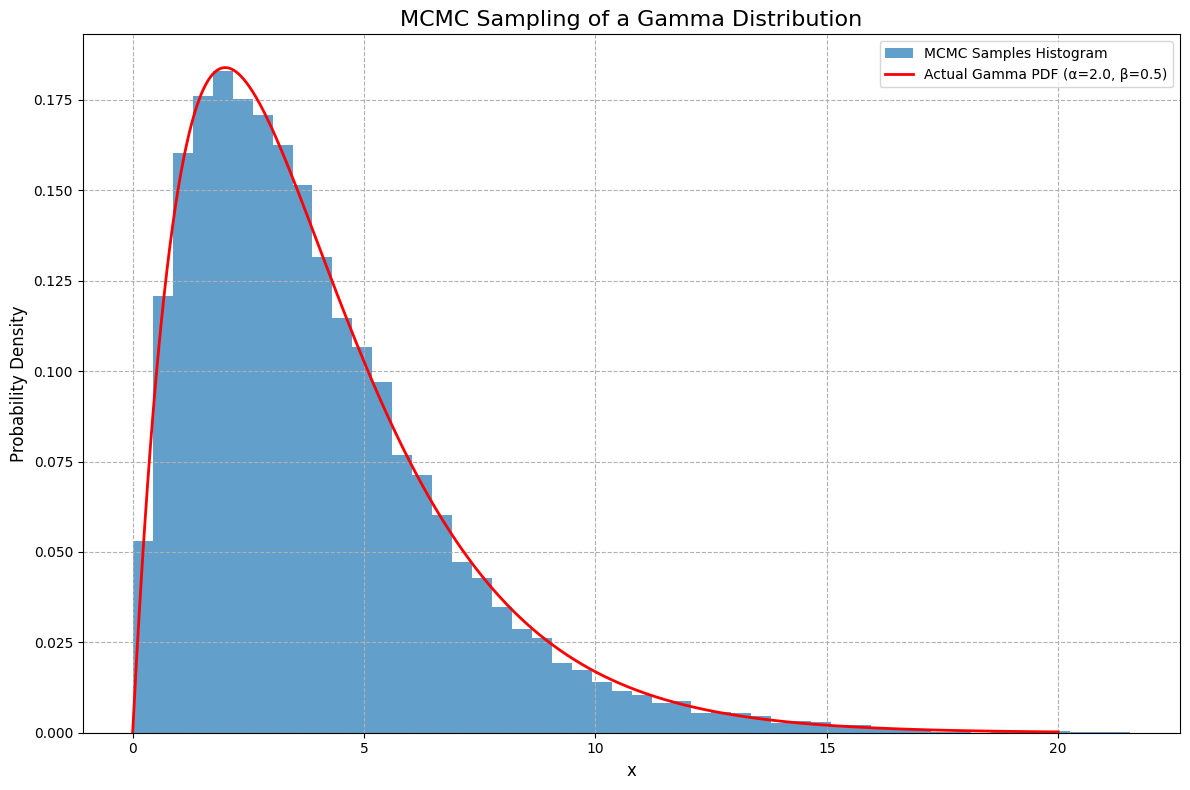

In [2]:
# --- 1. MCMC Algorithm Setup ---

def target_distribution_ratio(y, x, alpha, beta):
    """
    Calculates the ratio pi(y)/pi(x) for the Gamma distribution.
    The complex normalization constants cancel out.
    """
    return ((y / x)**(alpha - 1)) * np.exp(-beta * (y - x))

def metropolis_sampler(alpha, beta, num_samples=50000, initial_state=1.0, proposal_std=1.0):
    """
    Runs the Metropolis-Hastings MCMC sampler.
    """
    # Initialize the chain
    samples = [initial_state]
    current_state = initial_state
    
    for _ in range(num_samples):
        # Propose a new state from a Normal distribution
        proposal = np.random.normal(current_state, proposal_std)
        
        # Automatically reject proposals outside the domain of the Gamma distribution
        if proposal <= 0:
            samples.append(current_state)
            continue
            
        # Calculate acceptance probability
        acceptance_ratio = target_distribution_ratio(proposal, current_state, alpha, beta)
        p_accept = min(1, acceptance_ratio)
        
        # Accept or reject the proposal
        if np.random.rand() < p_accept:
            current_state = proposal
        
        samples.append(current_state)
        
    return np.array(samples)

# --- 2. Run the Simulation ---

# Parameters for our target Gamma distribution
alpha_param = 2.0
beta_param = 0.5

# Run the MCMC sampler
print("Running MCMC sampler...")
mcmc_samples = metropolis_sampler(alpha=alpha_param, beta=beta_param)
print("Sampling complete.")

# --- 3. Prepare Data for Plotting ---

# Apply a "burn-in" period to discard initial samples
burn_in = 10000
final_samples = mcmc_samples[burn_in:]

# Create a range of x-values for plotting the true PDF
x_values = np.linspace(0, 20, 1000)

# Calculate the true PDF of the Gamma distribution using scipy.stats
true_pdf = gamma.pdf(x_values, a=alpha_param, scale=1/beta_param)


# --- 4. Generate the Plot ---

plt.figure(figsize=(12, 8))

# Plot the histogram of our MCMC samples
# 'density=True' normalizes the histogram so its area is 1
plt.hist(final_samples, bins=50, density=True, label="MCMC Samples Histogram", alpha=0.7)

# Overlay the actual Gamma distribution PDF
plt.plot(x_values, true_pdf, 'r-', linewidth=2, label=f"Actual Gamma PDF (α={alpha_param}, β={beta_param})")

plt.title("MCMC Sampling of a Gamma Distribution", fontsize=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(True, ls="--")
plt.tight_layout()

# Save the plot
plt.savefig('Metropolis\mcmc_gamma_convergence.png')

print("\nPlot has been generated and saved as 'mcmc_gamma_convergence.png'")